In [2]:
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

import cv2
import io
import os

import numpy as np

from rembg.bg import remove
from tqdm import tqdm

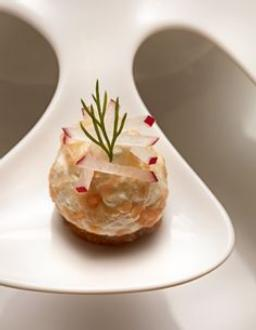

In [15]:
Image.open("../data/train_set/train_set/train_5152.jpg")

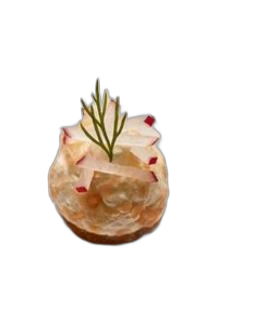

In [17]:
Image.open(io.BytesIO(remove(np.fromfile("../data/train_set/train_set/train_5152.jpg")))).convert("RGBA")

In [7]:
def remove_background(img, output):
    # Read file
    f = np.fromfile(img)
    # Remove background
    result = remove(f)
    
    # Convert to image and store
    img = Image.open(io.BytesIO(result)).convert("RGB")
    img.save(output)

In [20]:
train = "../data/train_set/train_set"

for t in tqdm(os.listdir(train)):
    remove_background(f"{train}/{t}", f"../data2/train_set_rmbg/train_set_rmbg/{t}")

100%|████████████████████████████████████| 30612/30612 [40:31<00:00, 12.59it/s]


In [22]:
test = "../data/test_set/test_set"

for t in tqdm(os.listdir(test)):
    remove_background(f"{test}/{t}", f"../data2/test_set_rmbg/test_set_rmbg/{t}")

100%|██████████████████████████████████████| 7653/7653 [10:09<00:00, 12.56it/s]
